In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scy
from astropy import convolution
import numpy.ma as ma
from scipy.optimize import curve_fit, least_squares
from scipy.integrate import quad
from astropy.io import fits
from astropy.table import Table
import fnmatch
import os
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii

In [5]:
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
from matplotlib import rcParams, rc
from matplotlib.ticker import MaxNLocator

import CogFunctions as cog

rc ('xtick',labelsize=15)
rc ('ytick',labelsize=15)
rc('font',family='serif', size=18)
rcParams['axes.linewidth'] = 1.5
rcParams['image.interpolation'] = 'none'
rcParams['figure.figsize'] = (10,7)

In [6]:
lines = np.loadtxt("line_list.txt", dtype='str')
print(lines)

[['0' 'FeII' '1142.366' '0.661']
 ['1' 'FeII' '1143.226' '1.342']
 ['2' 'FeII' '1144.938' '1.978']
 ['3' 'PII' '1152.818' '2.451']
 ['4' 'SiII' '1190.416' '2.541']
 ['5' 'SiII' '1193.290' '2.842']
 ['6' 'NI' '1199.550' '2.267']
 ['7' 'MgII' '1239.925' '-0.106']
 ['8' 'MgII' '1240.395' '-0.355']
 ['9' 'SII' '1250.578' '0.809']
 ['10' 'SII' '1253.805' '1.113']
 ['11' 'SII' '1259.518' '1.295']
 ['12' 'OI' '1302.168' '1.796']
 ['13' 'SiII' '1304.370' '2.052']
 ['14' 'NiII' '1317.217' '1.876']
 ['15' 'CII' '1334.532' '2.234']
 ['16' 'CuII' '1358.773' '2,569']
 ['17' 'NiII' '1370.132' '1.906']
 ['18' 'NiII' '1454.842' '1.672']
 ['19' 'SiII' '1526.707' '2.307']
 ['20' 'FeII' '1608.451' '1.968']
 ['21' 'FeII' '1611.200' '0.347']
 ['22' 'NiII' '1709.600' '1.743']
 ['23' 'NiII' '1741.549' '1.871']
 ['24' 'NiII' '1751.910' '1.686']
 ['25' 'SiII' '1808.013' '0.575']
 ['26' 'ZnII' '2026.136' '3.106']
 ['27' 'ZnII' '2062.664' '2.804']
 ['28' 'CrII' '2056.254' '2.326']
 ['29' 'CrII' '2066.161' '2.024

In [7]:
### read in the model

# #grid for the model
# N = np.arange(10,20,0.02)#logN 10 - 20 
# b = np.arange(5,100,.1)  # 5 -100
# LF_m = np.linspace(-8,-4,100)

model_cube = fits.open('model_00101.fits')   #in the model LF is in cm 
Model_array = model_cube[0].data

### the banana plot, error estimation 
N = np.arange(10,20,.01)#logN 10 - 20 
b = np.arange(5,100,.1)  # 5 -100
LF_m = np.linspace(-8,-4,100)



In [8]:
# box='/Users/ahamanowicz/Box/METALZ/COADDS/'

# fits_list=fnmatch.filter(os.listdir(box), '*coadd.fits')
# names_sight=[]
# print(fits_list)
# for string in fits_list:
#     new_string = string.replace("_COS_coadd.fits", "")
#     names_sight.append(new_string)

# names_sight = list(names_sight)
# names_sight = sorted(names_sight)

# ## coordinates    
    
# ra_hex = ['01:05:0.200', '01:05:0.6460','01:05.20700', '01:05:4.7670','01:05:4.900', '01:05:6.25', '01:04:43.8',
#          '01:05:3.0680', '01:05:6.3700','01:05:01.97','01:04:43.39','10:21:45.10', '10:11:0.6600', '10:10:53.800','10:11:5.38',
#          '10:11:6.047','10:10:58.19', '00:01:59.97','00:02:00.533']
# dec_hex=['+02:09:13.10', '+02:08:49.26','+02:09:28.10', '+02:09:23.19', '+02:09:32.60', '+02:10:43.0', '+02:06:44.75',
#         '+02:10:4.54','+02:09:31.34', '02:08:05.10','02:10:22.20','18:05:16.93', '-04:40:44.30', '-04:41:13', '-04:42:40.10',
#         '-04:42:11.37', '-04:43:18.4','-15:28:19.20','-15:29:52.41']
# c = SkyCoord(ra=ra_hex, dec=dec_hex,  unit=(u.hourangle, u.deg))

# #star_type=['O9.7II','O6.5III','O3III', 'O8.5III', 'O9.5I', 'O4',' O9.5I' ,'O6III','B0Ia','O9I', 'B1.5Ib','O9.7I(f)','O7.5III(f)','O9.5III-V','O9.7I(f)','O9.7Ia']

# #Teff =['32.5','41','~45', '35.5', '32.3', '45.7','32.3' ,'39.53','28.1 (26.3)','33.45', '23.7','30.2','37.5','34','30.2','30.2']
# #log_g=['32.0','3.7','~3.3', '3.4', '3.23', '3.73','3.23' ,'3.68','3.08(2.99)','3.26', '2.91','3.14','3.5','3.30','3.14','3.14']
# #model=['T32500g325v10.uv.7','T40000g375v10.uv.7', 'T45000g375v10.uv.7', 'T35000g350v10.uv.7','T32500g325v10.uv.7','T45000g375v10.uv.7',
# #       'T32500g325v10.uv.7','T40000g375v10.uv.7','T27500g300v10.uv.7','T32500g325v10.uv.7','T27500g300v10.uv.7',
# #       'T30000g325v10.uv.7','T37500g350v10.uv.7','T35000g325v10.uv.7','T30000g300v10.uv.7','T30000g300v10.uv.7' ]
# # sightlines_table= Table([range(1,np.size(names_sight)+1),names_sight, ra_hex, dec_hex, np.around(c.ra.degree, 4), np.around(c.dec.degree,4), star_type, Teff, log_g, model],
# #                         names=('lp','sightline', "RA [hex]", "Dec [hex]", "RA [deg]", "Dec [deg]", "Stellar type", "T_eff [kK]", "log(g)", "TLusty") ,meta={'name':'sightlines'})
# # sightlines_table.show_in_notebook()

# sightlines_table= Table([range(1,np.size(names_sight)+1),names_sight, ra_hex, dec_hex, np.around(c.ra.degree, 4), np.around(c.dec.degree,4)],
#                         names=('lp','sightline', "RA [hex]", "Dec [hex]", "RA [deg]", "Dec [deg]") ,meta={'name':'sightlines'})



# sightlines_table.show_in_notebook()

In [9]:
## Fe - 0,1,2,20,21,30,31

## S - 9,10,11


In [10]:
# sightlines_table.add_column(np.zeros((19,3)),name='log(N_SII)')
# sightlines_table.add_column(np.zeros((19,3)),name='log(N_FeII)')

res= Table.read('METALZ-results.fits')
sightlines_table= Table(res)
sightlines_table.show_in_notebook()

idx,lp,sightline,RA [hex],Dec [hex],RA [deg],Dec [deg],log(N_SII) [3],log(N_FeII) [3]
0,1,IC1613-61331,01:05:0.200,+02:09:13.10,16.2508,2.1536,15.11 .. 0.13,14.51 .. 0.29
1,2,IC1613-62024,01:05:0.6460,+02:08:49.26,16.2527,2.147,15.29 .. 0.44,15.1 .. 2.02
2,3,IC1613-64066,01:05.20700,+02:09:28.10,16.3017,2.1578,15.42 .. 0.88,14.81 .. 0.23
3,4,IC1613-67559,01:05:4.7670,+02:09:23.19,16.2699,2.1564,15.1 .. 0.17,14.62 .. 0.26
4,5,IC1613-67684,01:05:4.900,+02:09:32.60,16.2704,2.1591,15.08 .. 0.19,14.32 .. 0.24
5,6,IC1613-A13,01:05:6.25,+02:10:43.0,16.276,2.1786,15.32 .. 1.36,15.03 .. 1.91
6,7,IC1613-B11,01:04:43.8,+02:06:44.75,16.1825,2.1124,15.17 .. 0.37,14.41 .. 0.29
7,8,IC1613-B2,01:05:3.0680,+02:10:4.54,16.2628,2.1679,16.16 .. 3.74,15.19 .. 0.22
8,9,IC1613-B3,01:05:6.3700,+02:09:31.34,16.2765,2.1587,15.22 .. 0.27,14.87 .. 0.24
9,10,IC1613-B7,01:05:01.97,02:08:05.10,16.2582,2.1348,15.08 .. 0.36,14.4 .. 0.17


In [11]:
#read in the measurements file
#my measurements
#flag: 1- good measurmeent, 0 - limit, -1 - bad measurement
metalz = Table.read("metalZ-ew-measurements.txt", format='ascii')
MZmes = Table(metalz)#, names=["sightline", "line", "linewav", "Wr", "Wr_err", "flag", "v_clump", "v_lim", "ra", "dec"]) 
# metal_table=Table([metal_meas['sightline'],metal_meas['element'], metal_meas['wavelength'], metal_meas['ew'], metal_meas['err_ew'], metal_meas['logN']])
# print(metal_table)

MZmes.show_in_notebook()


idx,sightline,line,linewav,Wr,Wr_err,flag,v_clump,v_lim,v_masked,ra,dec,lsf
0,IC1613-61331,SII,1250.578,66.21,8.95,1,-246.126,52.71,-99,16.2508,2.1536,0.04
1,IC1613-61331,SII,1253.805,157.81,13.01,1,-246.126,52.71,-99,16.2508,2.1536,0.04
2,IC1613-61331,SII,1259.518,108.7,27.18,1,-246.126,52.71,-99,16.2508,2.1536,0.04
3,IC1613-61331,FeII,1142.366,-99.0,-99.0,1,-246.126,52.71,-99,16.2508,2.1536,0.05
4,IC1613-61331,FeII,1143.226,67.1,11.3,1,-246.126,52.71,-99,16.2508,2.1536,0.05
5,IC1613-61331,FeII,1144.938,108.82,11.45,1,-246.126,52.71,-99,16.2508,2.1536,0.05
6,IC1613-62024,SII,1250.578,83.3,10.22,1,-242.74,60.45,-99,16.2527,2.147,0.03
7,IC1613-62024,SII,1253.805,125.57,12.5,1,-242.74,60.45,-99,16.2527,2.147,0.03
8,IC1613-62024,SII,1259.518,116.72,29.91,1,-242.74,60.45,-99,16.2527,2.147,0.03
9,IC1613-62024,FeII,1142.366,66.32,13.73,1,-242.74,60.45,-99,16.2527,2.147,0.03


In [12]:
#read in voigt measurements
voigt= Table.read("voigt-fitting-mes.txt", format='ascii')
Voigt= Table(voigt)
Voigt.show_in_notebook()

idx,Target,log_N(HI),log_N(HI)_err,log_N(FeII)_q0.16,log_N(FeII)_q0.5,log_N(FeII)_q0.84,log_N(SII)_q0.16,log_N(SII)_q0.5,log_N(SII)_q0.84
0,IC1613-61331,20.82,0.026,14.351,14.492,14.707,15.284,15.367,15.502
1,IC1613-62024,21.05,0.031,15.12,15.334,15.962,15.445,15.698,16.593
2,IC1613-64066,20.88,0.035,14.531,14.728,15.065,15.24,15.34,15.91
3,IC1613-67559,20.47,0.104,14.438,14.582,14.821,14.95,15.087,15.41
4,IC1613-67684,20.44,0.037,14.255,14.343,14.524,14.752,14.872,15.103
5,IC1613-A13,20.26,0.034,14.542,14.939,15.447,14.941,15.069,15.399
6,IC1613-B2,21.17,0.027,15.013,15.176,15.352,15.905,16.587,17.475
7,IC1613-B7,20.73,0.033,14.702,14.786,14.885,15.172,15.236,15.32
8,IC1613-B11,20.37,0.042,14.229,14.486,14.96,15.122,15.315,16.012
9,SEXTANS-A-OB321,20.51,0.045,14.283,14.375,14.5,14.891,14.94,14.985


In [16]:
# table of f values (MOrton) 
fsii = np.array([0.809, 1.113,1.295]) #SII 1250, 1253, 1259
ffeii = np.array([0.661,1.342, 1.978]) #Fe II 1142, 1143, 1144, 1608 -1.968
f = [fsii,ffeii]

In [412]:
lines=['SII', 'FeII']
# open he file for N measurements
J = 16
name=sightlines_table['sightline'][J]

#choose the line
k=1
line=lines[k]
print(name, line, f[k])

SEXTANS-A-s3 FeII [0.661 1.342 1.978]


In [400]:
#grab the data for the sightline and theline
a = np.where((MZmes['sightline'] == name)& (MZmes['line'] == line))[0]

#read in data
wav = np.array(MZmes['linewav'][a], dtype='float')
w0 = np.array(MZmes['Wr'][a], dtype='float')
w0_err = np.array(MZmes['Wr_err'][a],dtype='float')
lf = f[k]

#check data
print(wav,w0,w0_err)

a = np.where(w0_err == -99)[0]
if 1608.451 in wav:
    print("1608")
    lf = np.append(lf, 1.968)
if np.size(a) > 0:
    w0_err = np.delete(w0_err, a,0)   
    w0=np.delete(w0,a,0)

    wav = np.delete(wav,a,0)
    print(wav)
    lf = np.delete(lf,a,0)
    print(wav,w0,w0_err)
    

# print(lf)

[1142.366 1143.226 1144.938] [ 40.72  58.39 116.68] [15.98 15.98 15.98]


14.89


Text(0.5, 1.0, 'SEXTANS-A-OB523 FeII')

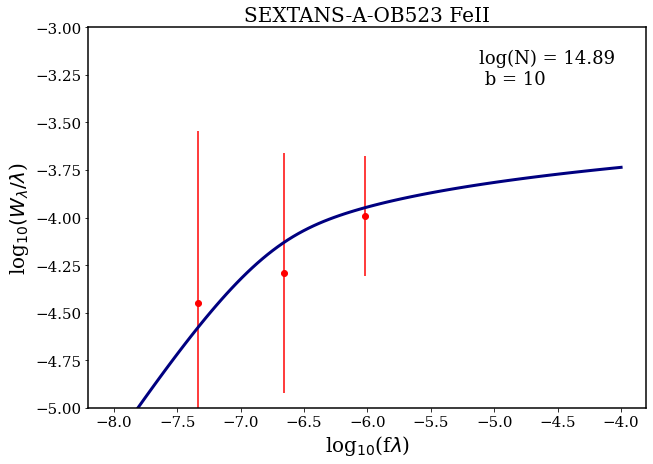

In [401]:
#initiall guess
c = np.where(Voigt['Target']== name)[0]

if np.size(c) > 0:
    if k==0:
        nvoigt = Voigt['log_N(SII)_q0.5'][c][0]
    elif k ==1:
        nvoigt = Voigt['log_N(FeII)_q0.5'][c][0]
else:
    nvoigt=15.0

Nguess, bguess = nvoigt, 10
W = cog.CoG_full(Nguess,bguess,LF_m)

y = w0/1000./wav # y = W/labmda
yerr = w0_err/1000./wav
yerr_plot = yerr/y /0.434 #error corretion (error propagation)

x=lf-8 #move to cm
print(Nguess)
#plot the guess
plt.errorbar(x,np.log10(y), yerr=abs(yerr_plot), fmt='ro')
plt.plot(LF_m,np.log10(W), c = 'navy', lw=3)
plt.ylim([-5.0, -3.0])
plt.xlabel(r"log$_{10}$(f$\lambda$)", fontsize=20)
plt.ylabel(r"log$_{10}(W_{\lambda} / \lambda$)", fontsize=20)
plt.annotate("log(N) = "+ str(Nguess) + "\n b = "+ str(bguess), (0.7,0.85), xycoords='axes fraction')
plt.title(name + " "+line, fontsize=20)


In [402]:
#find the N by comparing to the model
S = np.zeros((np.shape(Model_array)[2],np.shape(Model_array)[1]))
L =np.zeros((np.shape(Model_array)[2],np.shape(Model_array)[1]))
for i in range(np.shape(Model_array)[2]):

    for j in range(np.shape(Model_array)[1]):
        s_sum=0
        
        for w,s, l in zip(y, yerr, x):
   
            #find the lf in the model closest to the datapoint
            delta_l = np.abs(LF_m - l) 
            idx = np.argmin(delta_l)
            #print(idx)
            model = Model_array[idx][j][i] # model index lf, b, N
                       
            s_k = (w - 10**model)**2/(s)**2        
            s_sum+=s_k
    
        S[i][j] = s_sum
        L[i][j] = np.exp(-s_sum/2.)
        
S_min = np.min(S)

Chi_r =S#/(np.size(w0)-2) #skipping te reduced chi
print(np.min(Chi_r))

1.8152679304365482


In [403]:
index = np.where(Chi_r == np.min(Chi_r))
print(N[index[0]], b[index[1]]) #minimal chi

min_chi=np.min(Chi_r)
nbest,bbest = N[index[0]], b[index[1]]
nbest=round(nbest[0],2)
bbest = round(bbest[0],2)


[14.8] [8.8]


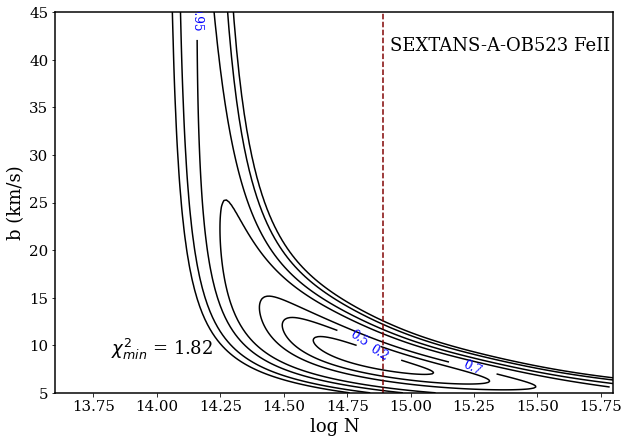

In [406]:
xlim, ylim = [13.6,15.8], [5,45]
cog.banana_plot(Chi_r, name=name, line=line, n_voigt=nvoigt, xlim=xlim, ylim=ylim)

5.4 8.8 14.8 -3.4000000000000004 6.0
14.42 14.8 15.46 -0.3800000000000008 0.6600000000000001
b = 8.8$\pm$ (6.0,3.4)
log(N) = 14.8$\pm$ (0.66,0.38)


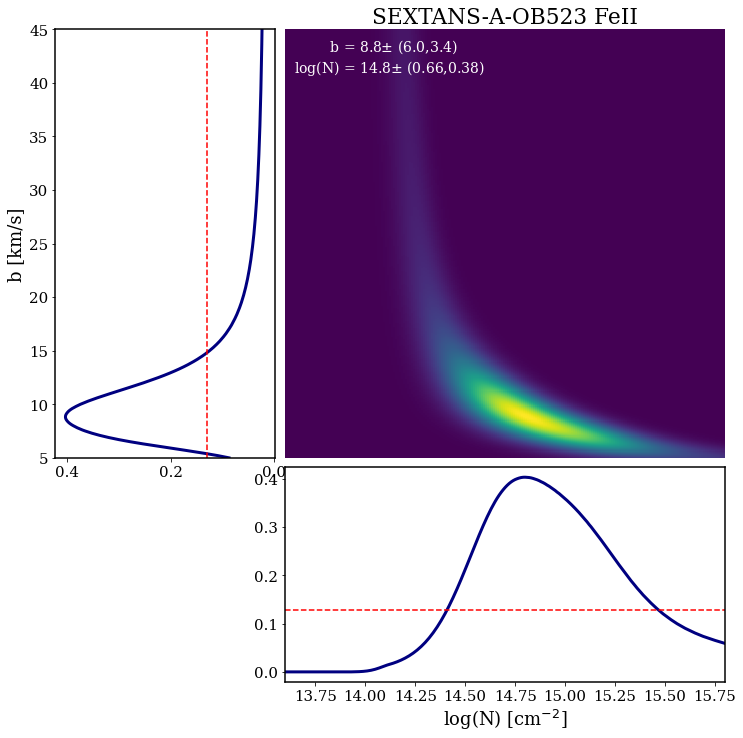

In [407]:
Lmax = np.max(L)
fig = plt.figure(figsize=(12,12))

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1], hspace=0.03, wspace=0.03)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
#ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])


ax2.imshow(L.T,origin='lower', extent=(10,20,5,100),aspect='auto' )
ax2.axis('off')
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
#plt.colorbar()
#plt.contour(L.T, levels=[Lmax*0.01,Lmax*0.1, Lmax*0.32 ], extent=(10,20,5,100),colors='red')

X, Y = np.array([]),np.array([])
for i in range(np.size(L[0])):
    X = np.append(X, np.max(L.T[i]))
for j in range(np.size(L.T[0])):
    Y = np.append(Y, np.max(L.T[:,j]))

sigmaX, sigmaY = np.std(X), np.std(Y)

    
ax1.plot(X, b, c='navy', lw=3)
ax1.set_ylim(ylim)
ax1.axvline(0.32*Lmax, ls='--', c='r')

ax1.set_ylabel("b [km/s]")
ax1.invert_xaxis()
ax4.plot(N, Y, c='navy', lw=3)
ax4.set_xlim(xlim)
ax4.set_xlabel(r'log(N) [cm$^{-2}$]')
ax4.axhline(0.32*Lmax, ls='--', c='r')

#estmate limits - 1 sigma range
#it is switched between b and n becasue we are plotting L.T (so back to the original N and b arrays we have to transpose)
ni=np.where(Y >= 0.32*Lmax) # all larger the 1 sigma confidence
bi = np.where(X >= 0.32*Lmax)


bmin, bmax = round(np.min(b[bi]),2), round(np.max(b[bi]),2)
nmin, nmax = round(np.min(N[ni]),2), round(np.max(N[ni]),2)
print(bmin, bbest, bmax, bmin-bbest,bmax-bbest)
print(nmin,nbest, nmax, nmin-nbest, nmax-nbest)
bdo, bup = round(-bmin+bbest,2), round(bmax-bbest,2)
ndo, nup = round(-nmin+nbest,2), round(nmax-nbest,2)


ax2.set_title(name+" "+ line)

ax2.annotate("        b = " + str(bbest) + r"$\pm$ ("+str(bup)+','+str(bdo)+")\nlog(N) = "+str(nbest) +r"$\pm$ ("+str(nup)+','+str(ndo)+")"  , (0.02, 0.9),xycoords='axes fraction', c='white', fontsize=14)


result= "b = " + str(bbest) + r"$\pm$ ("+str(bup)+','+str(bdo)+")\nlog(N) = "+str(nbest) +r"$\pm$ ("+str(nup)+','+str(ndo)+")"
print(result)

fig.savefig(name+" "+line+"_cogPDF.pdf")


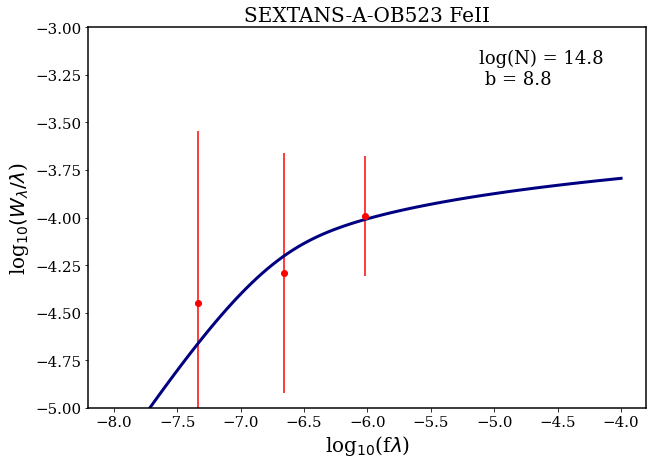

In [408]:
#plot the guess
W = cog.CoG_full(nbest,bbest,LF_m)
fig = plt.figure()
plt.errorbar(x,np.log10(y), yerr=abs(yerr_plot), fmt='ro')
plt.plot(LF_m,np.log10(W), c = 'navy', lw=3)
plt.ylim([-5.0, -3.0])
plt.xlabel(r"log$_{10}$(f$\lambda$)", fontsize=20)
plt.ylabel(r"log$_{10}(W_{\lambda} / \lambda$)", fontsize=20)
plt.annotate("log(N) = "+ str(nbest) + "\n b = "+ str(bbest), (0.7,0.85), xycoords='axes fraction')
plt.title(name + " "+line, fontsize=20)
fig.savefig(name + " "+line+"_cogFIT.pdf")

In [409]:
#nbest,ndo,nup = -99,-99,-99
if k == 0:
    sightlines_table['log(N_SII)'][J] = np.array([nbest,ndo,nup])
if k == 1:
    sightlines_table['log(N_FeII)'][J] = [nbest,ndo,nup]


In [410]:
sightlines_table.show_in_notebook()

idx,lp,sightline,RA [hex],Dec [hex],RA [deg],Dec [deg],log(N_SII) [3],log(N_FeII) [3]
0,1,IC1613-61331,01:05:0.200,+02:09:13.10,16.2508,2.1536,15.11 .. 0.13,14.76 .. 0.67
1,2,IC1613-62024,01:05:0.6460,+02:08:49.26,16.2527,2.147,15.29 .. 0.44,15.38 .. 0.41
2,3,IC1613-64066,01:05.20700,+02:09:28.10,16.3017,2.1578,15.42 .. 0.9,14.74 .. 0.21
3,4,IC1613-67559,01:05:4.7670,+02:09:23.19,16.2699,2.1564,15.1 .. 0.16,14.59 .. 0.26
4,5,IC1613-67684,01:05:4.900,+02:09:32.60,16.2704,2.1591,15.08 .. 0.19,14.31 .. 0.25
5,6,IC1613-A13,01:05:6.25,+02:10:43.0,16.276,2.1786,15.32 .. 1.36,14.7 .. 1.29
6,7,IC1613-B11,01:04:43.8,+02:06:44.75,16.1825,2.1124,15.17 .. 0.36,14.65 .. 0.95
7,8,IC1613-B2,01:05:3.0680,+02:10:4.54,16.2628,2.1679,16.16 .. 3.74,15.18 .. 0.24
8,9,IC1613-B3,01:05:6.3700,+02:09:31.34,16.2765,2.1587,15.22 .. 0.27,-99.0 .. -99.0
9,10,IC1613-B7,01:05:01.97,02:08:05.10,16.2582,2.1348,15.08 .. 0.36,14.52 .. 0.24


In [411]:
sightlines_table.write('METALZ-results.fits', format='fits', overwrite=True)  